In [1]:
# import required libraries for dataframe and visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from tabulate import tabulate
pd.set_option('mode.chained_assignment', None)
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster")
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster")

C:\Users\davin\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Merak v3

In [2]:
df = pd.read_csv('Result_Merak-7B-v3-Mini-Orca-Indo-GPTQ (1) (1).csv', delimiter=',')
df.head()

,Unnamed: 0,Question,Generated Answer,bleu,precisions,brevity_penalty,length_ratio,translation_length,reference_length,rouge1,rouge2,rougeL,rougeLsum,BERT,Inference Time
0,0,Dimana letak Candi Borobudur?,"Candi Borobudur terletak di Magelang, Jawa Ten...",1.000000,"[1.0, 1.0, 1.0, 1.0]",1.0,1.000000,10,10,1.000000,1.000000,1.000000,1.000000,[1.0000001192092896],15.239394
1,1,Kapan Candi Borobudur dibangun?,Candi Borobudur dibangun pada abad ke-9 oleh D...,0.587395,"[0.6666666666666666, 0.625, 0.5714285714285714...",1.0,1.500000,9,6,0.823529,0.800000,0.823529,0.823529,[0.878574550151825],15.760236
2,2,Siapa yang membangun Candi Borobudur?,Candi Borobudur dibangun oleh Dinasti Sailendr...,0.587395,"[0.6666666666666666, 0.625, 0.5714285714285714...",1.0,1.500000,9,6,0.750000,0.714286,0.750000,0.750000,[0.9669607281684875],16.174606
3,3,Apa fungsi utama Candi Borobudur?,Fungsi utama Candi Borobudur adalah sebagai te...,0.000000,"[0.13157894736842105, 0.08108108108108109, 0.0...",1.0,4.750000,38,8,0.227273,0.142857,0.227273,0.227273,{'error': 'Model firqaaa/indo-sentence-bert-ba...,59.699283
4,4,"Selain menjadi tempat ibadah ajaran Buddha, ap...",Candi Borobudur juga merupakan keajaiban arsit...,0.000000,"[0.17073170731707318, 0.075, 0.025641025641025...",1.0,3.153846,41,13,0.208333,0.130435,0.208333,0.208333,[0.6903210282325745],65.290180


In [3]:
def clean_and_fill_bert(text):
    """Performs combined cleaning and NaN replacement for BERT column.

    Args:
        text (str): Text data from the BERT column.

    Returns:
        float: Cleaned and potentially replaced BERT value.
    """

    # Handle invalid characters and strip unnecessary brackets in one step
    text = text.strip('[]').replace('{', '')

    # Efficient NaN replacement using try-except for potential conversion errors
    try:
        return float(text)  # Convert to float if possible
    except ValueError:
        # If conversion fails (likely due to NaN), fill with mean
        return BertMean

df["BERT"] = df["BERT"].apply(clean_and_fill_bert)

NameError: name 'BertMean' is not defined

In [876]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          80 non-null     int64  
 1   Question            80 non-null     object 
 2   Generated Answer    80 non-null     object 
 3   bleu                80 non-null     float64
 4   precisions          80 non-null     object 
 5   brevity_penalty     80 non-null     float64
 6   length_ratio        80 non-null     float64
 7   translation_length  80 non-null     int64  
 8   reference_length    80 non-null     int64  
 9   rouge1              80 non-null     float64
 10  rouge2              80 non-null     float64
 11  rougeL              80 non-null     float64
 12  rougeLsum           80 non-null     float64
 13  BERT                80 non-null     float64
 14  Inference Time      80 non-null     float64
dtypes: float64(9), int64(3), object(3)
memory usage: 9.5+ KB


In [877]:
df_null = (df.isnull().sum())
df_null

Unnamed: 0            0
Question              0
Generated Answer      0
bleu                  0
precisions            0
brevity_penalty       0
length_ratio          0
translation_length    0
reference_length      0
rouge1                0
rouge2                0
rougeL                0
rougeLsum             0
BERT                  0
Inference Time        0
dtype: int64

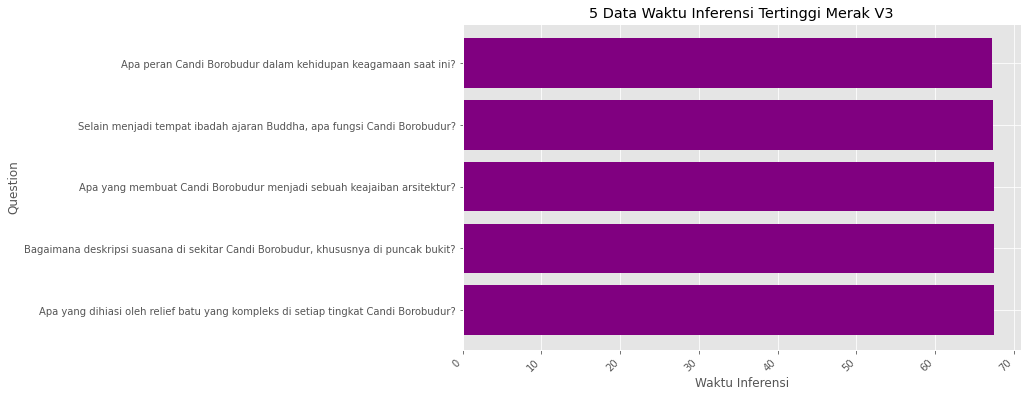

In [878]:
# Urutkan data berdasarkan kolom Avg_Pemkwh secara descending
datakwh = df.sort_values(by="Inference Time", ascending=False)

# Buat bar plot
plt.figure(figsize=(10, 6))
bar_plot = plt.barh(datakwh.head(5)["Question"], datakwh.head(5)["Inference Time"], color='purple')

# Tambahkan judul
plt.title("5 Data Waktu Inferensi Tertinggi Merak V3")

# Tambahkan label sumbu
plt.xlabel("Waktu Inferensi")
plt.ylabel("Question")

# Menyesuaikan label sumbu x agar tetap tampil
plt.xticks(rotation=45, ha="right")

# Menampilkan plot
plt.show()


(array([24.,  7.,  2.,  6.,  2.,  4.,  1.,  0.,  1., 33.]),
 array([12.67035675, 18.15208011, 23.63380346, 29.11552682, 34.59725018,
        40.07897353, 45.56069689, 51.04242024, 56.5241436 , 62.00586696,
        67.48759031]),
 <BarContainer object of 10 artists>)

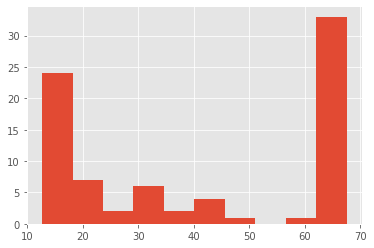

In [879]:
plt.hist(datakwh["Inference Time"])

In [880]:
# # Remove square brackets and convert to float, handling non-numeric values
# df['BERT'] = df['BERT'].apply(lambda x: float(str(x).strip('[]')) if '[' in str(x) else None)

# # Drop rows with non-numeric values
# df.dropna(subset=['BERT'], inplace=True)

# df.head()

In [881]:
print(df["BERT"])

0     1.000000
1     0.878575
2     0.966961
3     0.828058
4     0.690321
        ...   
75    0.688597
76    0.907674
77    0.817792
78    0.821599
79    0.897135
Name: BERT, Length: 80, dtype: float64


In [882]:
# Calculate mean values
mean_rouge1_a = np.mean(df["rouge1"])
mean_bleu_a = np.mean(df["bleu"])
mean_bert_a = np.mean(df["BERT"])
print("Mean ROUGE1 Merak V3:", mean_rouge1_a)
print("Mean BLEU Merak V3:", mean_bleu_a)
print("Mean BERT Merak V3:", mean_bert_a)

Mean ROUGE1 Merak V3: 0.6067188090476692
Mean BLEU Merak V3: 0.3376576145400029
Mean BERT Merak V3: 0.8694610469788312


In [883]:
mean_inf_a = np.mean(df["Inference Time"])
print("Mean Inference Time:", mean_inf_a)

Mean Inference Time: 40.85683945417404


Mean Inference Time: 40.85683945417404


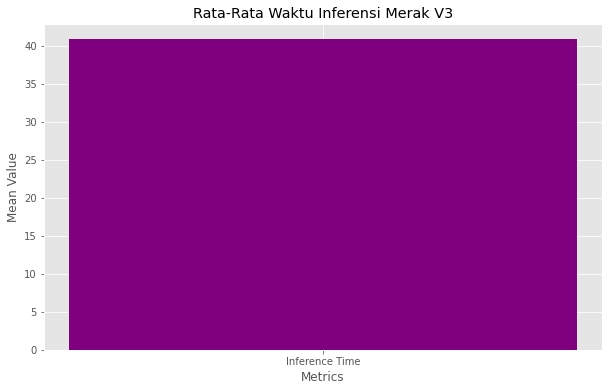

In [884]:
mean_inf_a = np.mean(df["Inference Time"])
print("Mean Inference Time:", mean_inf_a)
# Plotting
labels = ["Inference Time"]
mean_values = [mean_inf_a]
plt.figure(figsize=(10, 6))
plt.bar(labels, mean_values, color=['PURPLE'])
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.title('Rata-Rata Waktu Inferensi Merak V3')
plt.show()

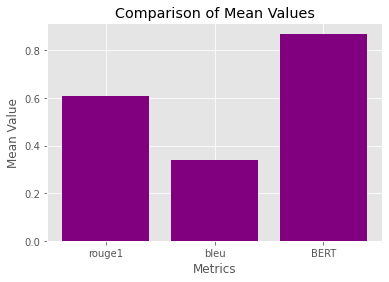

In [885]:
# Calculate mean values
mean_rouge1_a = np.mean(df["rouge1"])
mean_bleu_a = np.mean(df["bleu"])
mean_bert_a = np.mean(df["BERT"])

# Plotting
labels = ['rouge1', 'bleu', 'BERT']
mean_values = [mean_rouge1_a, mean_bleu_a, mean_bert_a]

plt.bar(labels, mean_values, color=['purple', 'purple', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.title('Comparison of Mean Values')
plt.show()

In [886]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          80 non-null     int64  
 1   Question            80 non-null     object 
 2   Generated Answer    80 non-null     object 
 3   bleu                80 non-null     float64
 4   precisions          80 non-null     object 
 5   brevity_penalty     80 non-null     float64
 6   length_ratio        80 non-null     float64
 7   translation_length  80 non-null     int64  
 8   reference_length    80 non-null     int64  
 9   rouge1              80 non-null     float64
 10  rouge2              80 non-null     float64
 11  rougeL              80 non-null     float64
 12  rougeLsum           80 non-null     float64
 13  BERT                80 non-null     float64
 14  Inference Time      80 non-null     float64
dtypes: float64(9), int64(3), object(3)
memory usage: 9.5+ KB


## Sea lion

In [887]:
df1 = pd.read_csv('sea-lion-7b (1).csv', delimiter=',')
df1.head()

,Unnamed: 0,Question,Generated Answer,bleu,precisions,brevity_penalty,length_ratio,translation_length,reference_length,rouge1,rouge2,rougeL,rougeLsum,BERT,Inference Time
0,0,Dimana letak Candi Borobudur?,"Candi Borobudur terletak di Magelang, Jawa Ten...",1.000000,"[1.0, 1.0, 1.0, 1.0]",1.000000,1.000000,10,10,1.000000,1.000000,1.000000,1.000000,[1.0000001192092896],9.776959
1,1,Kapan Candi Borobudur dibangun?,Candi Borobudur dibangun pada abad ke-9 oleh D...,0.587395,"[0.6666666666666666, 0.625, 0.5714285714285714...",1.000000,1.500000,9,6,0.823529,0.800000,0.823529,0.823529,[0.878574550151825],7.129030
2,2,Siapa yang membangun Candi Borobudur?,Candi Borobudur dibangun oleh Dinasti Sailendra,1.000000,"[1.0, 1.0, 1.0, 1.0]",1.000000,1.000000,6,6,1.000000,1.000000,1.000000,1.000000,[0.9999999403953552],6.540647
3,3,Apa fungsi utama Candi Borobudur?,Candi Borobudur merupakan tempat ibadah bagi u...,0.000000,"[0.625, 0.2857142857142857, 0.0, 0.0]",1.000000,1.000000,8,8,0.625000,0.285714,0.625000,0.625000,[0.970352828502655],6.462934
4,4,"Selain menjadi tempat ibadah ajaran Buddha, ap...",Candi Borobudur merupakan keajaiban arsitektur...,0.000000,"[0.5714285714285714, 0.3333333333333333, 0.0, ...",0.424373,0.538462,7,13,0.444444,0.250000,0.444444,0.444444,[0.8811632990837097],7.163709


In [888]:
def clean_and_fill_bert(text):
    """Performs combined cleaning and NaN replacement for BERT column.

    Args:
        text (str): Text data from the BERT column.

    Returns:
        float: Cleaned and potentially replaced BERT value.
    """

    # Handle invalid characters and strip unnecessary brackets in one step
    text = text.strip('[]').replace('{', '')

    # Efficient NaN replacement using try-except for potential conversion errors
    try:
        return float(text)  # Convert to float if possible
    except ValueError:
        # If conversion fails (likely due to NaN), fill with mean
        return BertMean

df1["BERT"] = df1["BERT"].apply(clean_and_fill_bert)

In [889]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          80 non-null     int64  
 1   Question            80 non-null     object 
 2   Generated Answer    80 non-null     object 
 3   bleu                80 non-null     float64
 4   precisions          80 non-null     object 
 5   brevity_penalty     80 non-null     float64
 6   length_ratio        80 non-null     float64
 7   translation_length  80 non-null     int64  
 8   reference_length    80 non-null     int64  
 9   rouge1              80 non-null     float64
 10  rouge2              80 non-null     float64
 11  rougeL              80 non-null     float64
 12  rougeLsum           80 non-null     float64
 13  BERT                80 non-null     float64
 14  Inference Time      80 non-null     float64
dtypes: float64(9), int64(3), object(3)
memory usage: 9.5+ KB


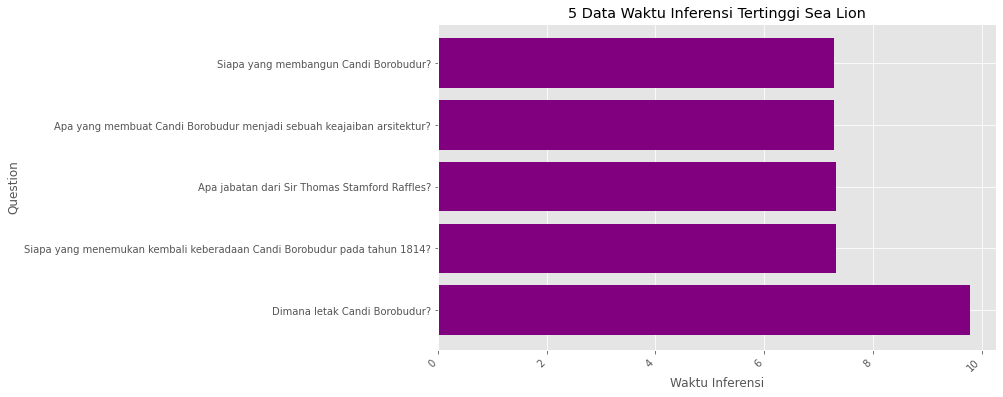

In [890]:
# Urutkan data berdasarkan kolom Avg_Pemkwh secara descending
data1 = df1.sort_values(by="Inference Time", ascending=False)

# Buat bar plot
plt.figure(figsize=(10, 6))
bar_plot = plt.barh(data1.head(5)["Question"], data1.head(5)["Inference Time"], color='purple')

# Tambahkan judul
plt.title("5 Data Waktu Inferensi Tertinggi Sea Lion")

# Tambahkan label sumbu
plt.xlabel("Waktu Inferensi")
plt.ylabel("Question")

# Menyesuaikan label sumbu x agar tetap tampil
plt.xticks(rotation=45, ha="right")

# Menampilkan plot
plt.show()


In [891]:
# # Remove square brackets and convert to float, handling non-numeric values
# df1['BERT'] = df1['BERT'].apply(lambda x: float(str(x).strip('[]')) if '[' in str(x) else None)

# # Drop rows with non-numeric values
# df1.dropna(subset=['BERT'], inplace=True)

# print(df1)

In [892]:
# Calculate mean values
mean_rouge1_b = np.mean(df1["rouge1"])
mean_bleu_b = np.mean(df1["bleu"])
mean_bert_b = np.mean(df1["BERT"])
print("Mean ROUGE1 Sea Lion:", mean_rouge1_b)
print("Mean BLEU Sea Lion:", mean_bleu_b)
print("Mean BERT Sea Lion:", mean_bert_b)

Mean ROUGE1 Sea Lion: 0.4476410898029107
Mean BLEU Sea Lion: 0.24195364594388832
Mean BERT Sea Lion: 0.6721615408814977


In [893]:
mean_inf_b = np.mean(df1["Inference Time"])
print("Mean Inference Time:", mean_inf_b)

Mean Inference Time: 6.894207420945167


Mean Inference Time: 6.894207420945167


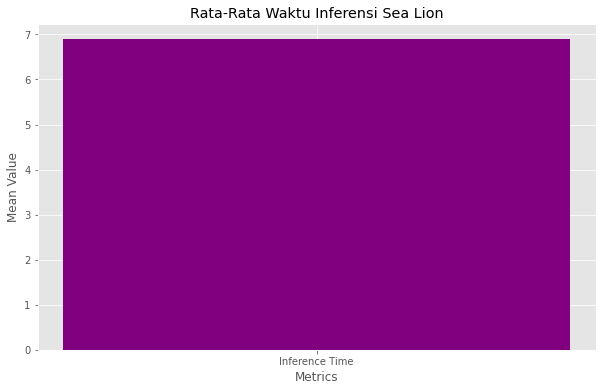

In [894]:
mean_inf_b = np.mean(df1["Inference Time"])
print("Mean Inference Time:", mean_inf_b)
# Plotting
labels = ["Inference Time"]
mean_values = [mean_inf_b]
plt.figure(figsize=(10, 6))
plt.bar(labels, mean_values, color=['PURPLE'])
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.title('Rata-Rata Waktu Inferensi Sea Lion')
plt.show()

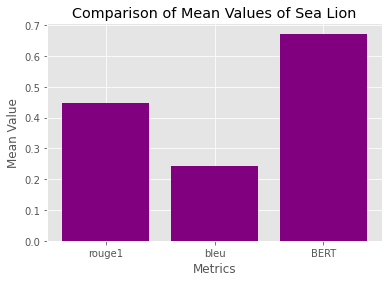

In [895]:
# Calculate mean values
mean_rouge1_b = np.mean(df1["rouge1"])
mean_bleu_b = np.mean(df1["bleu"])
mean_bert_b = np.mean(df1["BERT"])

# Plotting
labels = ['rouge1', 'bleu', 'BERT']
mean_values = [mean_rouge1_b, mean_bleu_b, mean_bert_b]

plt.bar(labels, mean_values, color=['purple', 'purple', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.title('Comparison of Mean Values of Sea Lion')
plt.show()

# LLAMA 3

In [896]:
df2 = pd.read_csv('Llama3-ChatQA-1.5-8B_Result.csv', delimiter=',')
df2.head()

,Unnamed: 0,Question,Generated Answer,bleu,precisions,brevity_penalty,length_ratio,translation_length,reference_length,rouge1,rouge2,rougeL,rougeLsum,BERT,Inference Time
0,0,Dimana letak Candi Borobudur?,"Borobudur terletak di Magelang, Jawa Tengah, ...",0.880112,"[0.9, 0.8888888888888888, 0.875, 0.85714285714...",1.000000,1.000000,10,10,0.933333,0.923077,0.933333,0.933333,[0.9558199048042297],2.605359
1,1,Kapan Candi Borobudur dibangun?,Borobudur dibangun pada abad ke-9 oleh Dinast...,0.446324,"[0.5555555555555556, 0.5, 0.42857142857142855,...",1.000000,1.500000,9,6,0.750000,0.714286,0.750000,0.750000,{'error': 'Model firqaaa/indo-sentence-bert-ba...,2.514384
2,2,Siapa yang membangun Candi Borobudur?,Dinasti Sailendra,0.000000,"[1.0, 1.0, 0.0, 0.0]",0.135335,0.333333,2,6,0.500000,0.333333,0.500000,0.500000,{'error': 'Model firqaaa/indo-sentence-bert-ba...,0.919221
3,3,Apa fungsi utama Candi Borobudur?,Borobudur memiliki fungsi utama sebagai tempa...,0.000000,"[0.15151515151515152, 0.0625, 0.03225806451612...",1.000000,4.125000,33,8,0.270270,0.114286,0.270270,0.270270,{'error': 'Model firqaaa/indo-sentence-bert-ba...,4.232192
4,4,"Selain menjadi tempat ibadah ajaran Buddha, ap...","Selain menjadi tempat ibadah ajaran Buddha, f...",0.000000,"[0.5882352941176471, 0.25, 0.06666666666666667...",1.000000,1.307692,17,13,0.615385,0.333333,0.615385,0.615385,{'error': 'Model firqaaa/indo-sentence-bert-ba...,3.044538


In [897]:
def clean_and_fill_bert(text):
    """Performs combined cleaning and NaN replacement for BERT column.

    Args:
        text (str): Text data from the BERT column.

    Returns:
        float: Cleaned and potentially replaced BERT value.
    """

    # Handle invalid characters and strip unnecessary brackets in one step
    text = text.strip('[]').replace('{', '')

    # Efficient NaN replacement using try-except for potential conversion errors
    try:
        return float(text)  # Convert to float if possible
    except ValueError:
        # If conversion fails (likely due to NaN), fill with mean
        return BertMean

df2["BERT"] = df2["BERT"].apply(clean_and_fill_bert)

In [898]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          80 non-null     int64  
 1   Question            80 non-null     object 
 2   Generated Answer    80 non-null     object 
 3   bleu                80 non-null     float64
 4   precisions          80 non-null     object 
 5   brevity_penalty     80 non-null     float64
 6   length_ratio        80 non-null     float64
 7   translation_length  80 non-null     int64  
 8   reference_length    80 non-null     int64  
 9   rouge1              80 non-null     float64
 10  rouge2              80 non-null     float64
 11  rougeL              80 non-null     float64
 12  rougeLsum           80 non-null     float64
 13  BERT                80 non-null     float64
 14  Inference Time      80 non-null     float64
dtypes: float64(9), int64(3), object(3)
memory usage: 9.5+ KB


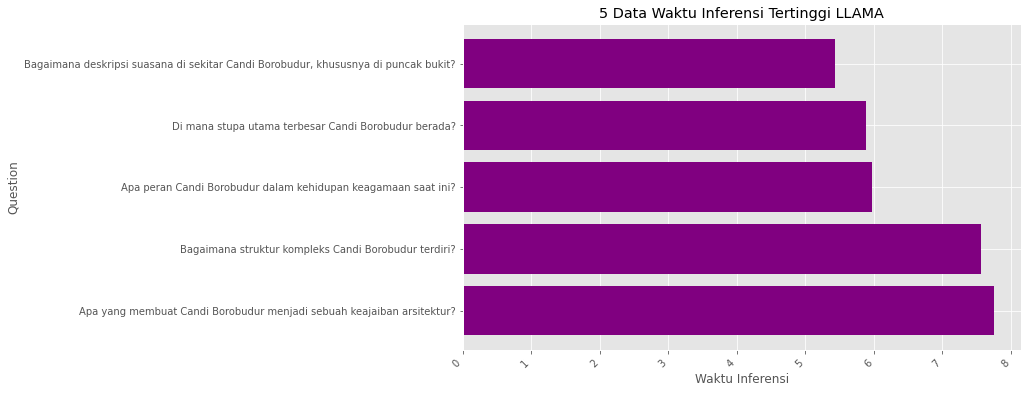

In [899]:
# Urutkan data berdasarkan kolom Avg_Pemkwh secara descending
data2 = df2.sort_values(by="Inference Time", ascending=False)

# Buat bar plot
plt.figure(figsize=(10, 6))
bar_plot = plt.barh(data2.head(9)["Question"], data2.head(9)["Inference Time"], color='purple')

# Tambahkan judul
plt.title("5 Data Waktu Inferensi Tertinggi LLAMA")

# Tambahkan label sumbu
plt.xlabel("Waktu Inferensi")
plt.ylabel("Question")

# Menyesuaikan label sumbu x agar tetap tampil
plt.xticks(rotation=45, ha="right")

# Menampilkan plot
plt.show()


In [900]:
# Calculate mean values
mean_rouge1_c = np.mean(df2["rouge1"])
mean_bleu_c = np.mean(df2["bleu"])
mean_bert_c = np.mean(df2["BERT"])
print("Mean ROUGE1 LLAMA 3:", mean_rouge1_c)
print("Mean BLEU LLAMA 3:", mean_bleu_c)
print("Mean BERT LLAMA 3:", mean_bert_c)

Mean ROUGE1 LLAMA 3: 0.42915340105667166
Mean BLEU LLAMA 3: 0.2396631619060597
Mean BERT LLAMA 3: 0.5997789753414691


Mean Inference Time: 2.685270529985428


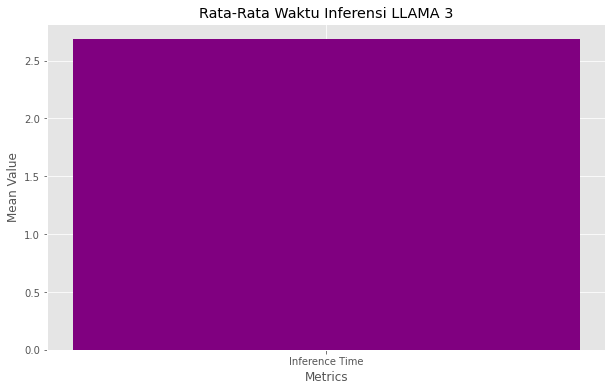

In [901]:
mean_inf_c = np.mean(df2["Inference Time"])
print("Mean Inference Time:", mean_inf_c)
# Plotting
labels = ["Inference Time"]
mean_values = [mean_inf_c]
plt.figure(figsize=(10, 6))
plt.bar(labels, mean_values, color=['PURPLE'])
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.title('Rata-Rata Waktu Inferensi LLAMA 3')
plt.show()

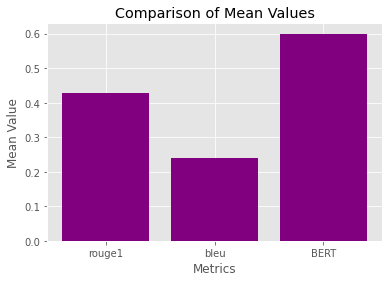

In [902]:
# Calculate mean values
mean_rouge1_c = np.mean(df2["rouge1"])
mean_bleu_c = np.mean(df2["bleu"])
mean_bert_c = np.mean(df2["BERT"])

# Plotting
labels = ['rouge1', 'bleu', 'BERT']
mean_values = [mean_rouge1_c, mean_bleu_c, mean_bert_c]

plt.bar(labels, mean_values, color=['purple'])
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.title('Comparison of Mean Values')
plt.show()

# Sailor

In [903]:
df3 = pd.read_csv('Sailor-7B (1).csv', delimiter=',')
df3.head()

,Unnamed: 0,Question,Generated Answer,bleu,precisions,brevity_penalty,length_ratio,translation_length,reference_length,rouge1,rouge2,rougeL,rougeLsum,BERT,Inference Time
0,0,Dimana letak Candi Borobudur?,"Candi Borobudur terletak di Magelang, Jawa Ten...",1.000000,"[1.0, 1.0, 1.0, 1.0]",1.000000,1.000000,10,10,1.000000,1.000000,1.000000,1.000000,[1.0000001192092896],9.311400
1,1,Kapan Candi Borobudur dibangun?,Candi Borobudur dibangun pada abad ke-9 oleh D...,0.587395,"[0.6666666666666666, 0.625, 0.5714285714285714...",1.000000,1.500000,9,6,0.823529,0.800000,0.823529,0.823529,[0.878574550151825],7.300974
2,2,Siapa yang membangun Candi Borobudur?,Candi Borobudur dibangun oleh Dinasti Sailendra,1.000000,"[1.0, 1.0, 1.0, 1.0]",1.000000,1.000000,6,6,1.000000,1.000000,1.000000,1.000000,[0.9999999403953552],6.992095
3,3,Apa fungsi utama Candi Borobudur?,Candi Borobudur merupakan tempat ibadah bagi u...,0.000000,"[0.625, 0.2857142857142857, 0.0, 0.0]",1.000000,1.000000,8,8,0.625000,0.285714,0.625000,0.625000,[0.970352828502655],6.627852
4,4,"Selain menjadi tempat ibadah ajaran Buddha, ap...",Candi Borobudur merupakan keajaiban arsitektur...,0.000000,"[0.5714285714285714, 0.3333333333333333, 0.0, ...",0.424373,0.538462,7,13,0.444444,0.250000,0.444444,0.444444,[0.8811632990837097],6.906015


In [904]:
def clean_and_fill_bert(text):
    """Performs combined cleaning and NaN replacement for BERT column.

    Args:
        text (str): Text data from the BERT column.

    Returns:
        float: Cleaned and potentially replaced BERT value.
    """

    # Handle invalid characters and strip unnecessary brackets in one step
    text = text.strip('[]').replace('{', '')

    # Efficient NaN replacement using try-except for potential conversion errors
    try:
        return float(text)  # Convert to float if possible
    except ValueError:
        # If conversion fails (likely due to NaN), fill with mean
        return BertMean

df3["BERT"] = df3["BERT"].apply(clean_and_fill_bert)

In [905]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          80 non-null     int64  
 1   Question            80 non-null     object 
 2   Generated Answer    80 non-null     object 
 3   bleu                80 non-null     float64
 4   precisions          80 non-null     object 
 5   brevity_penalty     80 non-null     float64
 6   length_ratio        80 non-null     float64
 7   translation_length  80 non-null     int64  
 8   reference_length    80 non-null     int64  
 9   rouge1              80 non-null     float64
 10  rouge2              80 non-null     float64
 11  rougeL              80 non-null     float64
 12  rougeLsum           80 non-null     float64
 13  BERT                80 non-null     float64
 14  Inference Time      80 non-null     float64
dtypes: float64(9), int64(3), object(3)
memory usage: 9.5+ KB


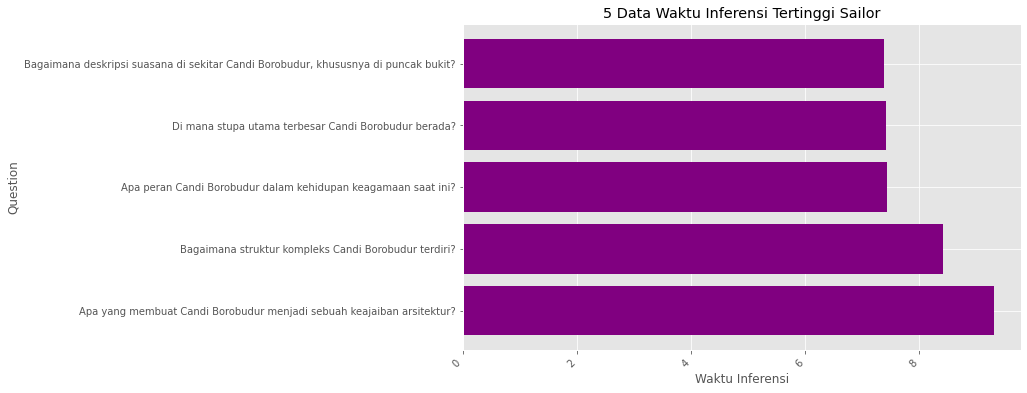

In [906]:
# Urutkan data berdasarkan kolom Avg_Pemkwh secara descending
data3 = df3.sort_values(by="Inference Time", ascending=False)

# Buat bar plot
plt.figure(figsize=(10, 6))
bar_plot = plt.barh(data2.head(9)["Question"], data3.head(9)["Inference Time"], color='purple')

# Tambahkan judul
plt.title("5 Data Waktu Inferensi Tertinggi Sailor")

# Tambahkan label sumbu
plt.xlabel("Waktu Inferensi")
plt.ylabel("Question")

# Menyesuaikan label sumbu x agar tetap tampil
plt.xticks(rotation=45, ha="right")

# Menampilkan plot
plt.show()


In [907]:
# Calculate mean values
mean_rouge1_d = np.mean(df3["rouge1"])
mean_bleu_d = np.mean(df3["bleu"])
mean_bert_d = np.mean(df3["BERT"])
print("Mean ROUGE1 Sailor:", mean_rouge1_d)
print("Mean BLEU Sailor:", mean_bleu_d)
print("Mean BERT Sailor:", mean_bert_d)

Mean ROUGE1 Sailor: 0.4489535898029106
Mean BLEU Sailor: 0.2325713643410144
Mean BERT Sailor: 0.6771241412765812


Mean Inference Time: 7.0100217252969745


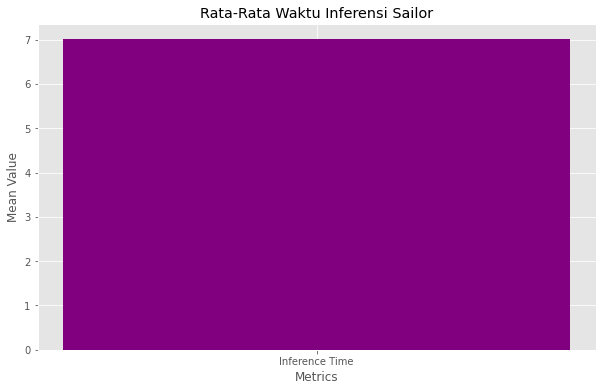

In [908]:
mean_inf_d = np.mean(df3["Inference Time"])
print("Mean Inference Time:", mean_inf_d)
# Plotting
labels = ["Inference Time"]
mean_values = [mean_inf_d]
plt.figure(figsize=(10, 6))
plt.bar(labels, mean_values, color=['PURPLE'])
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.title('Rata-Rata Waktu Inferensi Sailor')
plt.show()

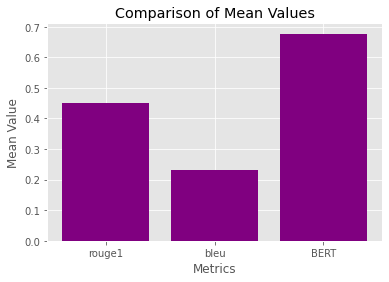

In [909]:
# Calculate mean values
mean_rouge1_d = np.mean(df3["rouge1"])
mean_bleu_d = np.mean(df3["bleu"])
mean_bert_d = np.mean(df3["BERT"])

# Plotting
labels = ['rouge1', 'bleu', 'BERT']
mean_values = [mean_rouge1_d, mean_bleu_d, mean_bert_d]

plt.bar(labels, mean_values, color=['purple'])
plt.xlabel('Metrics')
plt.ylabel('Mean Value')
plt.title('Comparison of Mean Values')
plt.show()

# Plotting per metric

In [910]:
def create_plot(labels,values):
    plt.figure(figsize=(10,5),dpi=100)
    
    plt.bar(labels, values, color=['purple'])
    plt.xlabel('Metrics')
    plt.ylabel('Mean Value')
    plt.title('Comparison of Mean Values')
    plt.show()

<Figure size 720x432 with 0 Axes>

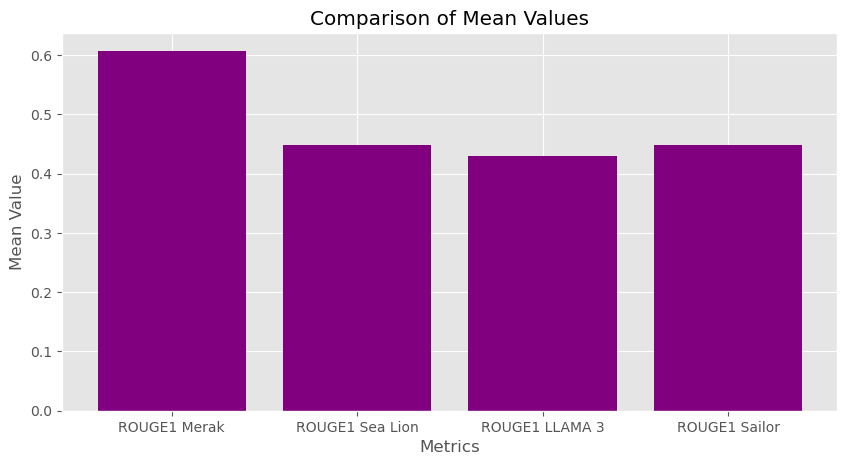

In [911]:
# Plotting
plt.figure(figsize=(10, 6))
labels = ['ROUGE1 Merak', 'ROUGE1 Sea Lion', 'ROUGE1 LLAMA 3', 'ROUGE1 Sailor']
mean_rougee = [mean_rouge1_a, mean_rouge1_b, mean_rouge1_c, mean_rouge1_d]
create_plot(labels,mean_rougee)

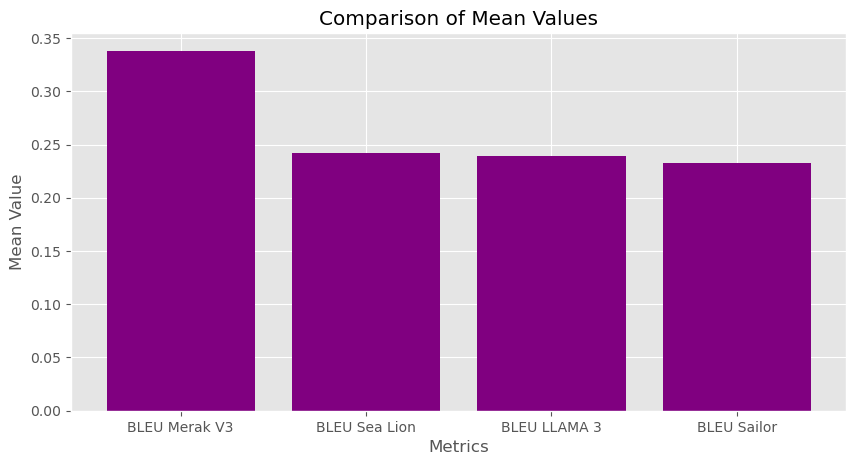

In [912]:
# Plotting
labels = ['BLEU Merak V3', 'BLEU Sea Lion', 'BLEU LLAMA 3', 'BLEU Sailor']
mean_bleu = [mean_bleu_a, mean_bleu_b, mean_bleu_c, mean_bleu_d]
create_plot(labels,mean_bleu)

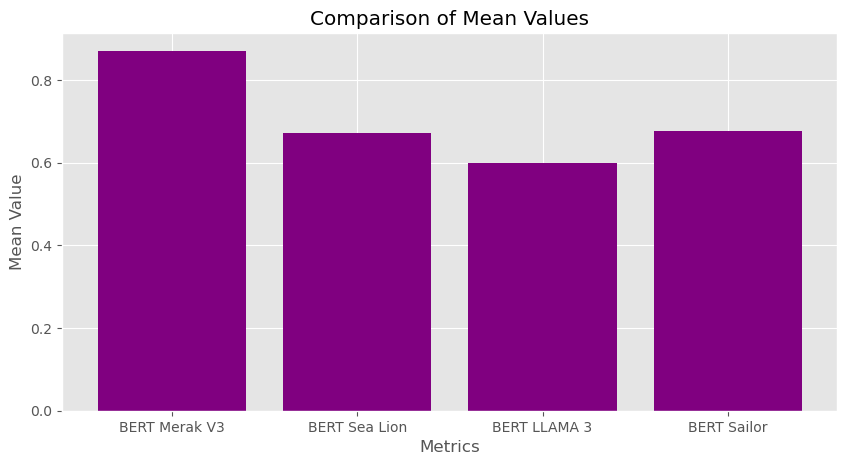

In [913]:
# Plotting
labels = ['BERT Merak V3', 'BERT Sea Lion', 'BERT LLAMA 3', 'BERT Sailor']
mean_bleu = [mean_bert_a, mean_bert_b, mean_bert_c, mean_bert_d]
create_plot(labels,mean_bleu)

# Avg waktu inferensi

<Figure size 720x432 with 0 Axes>

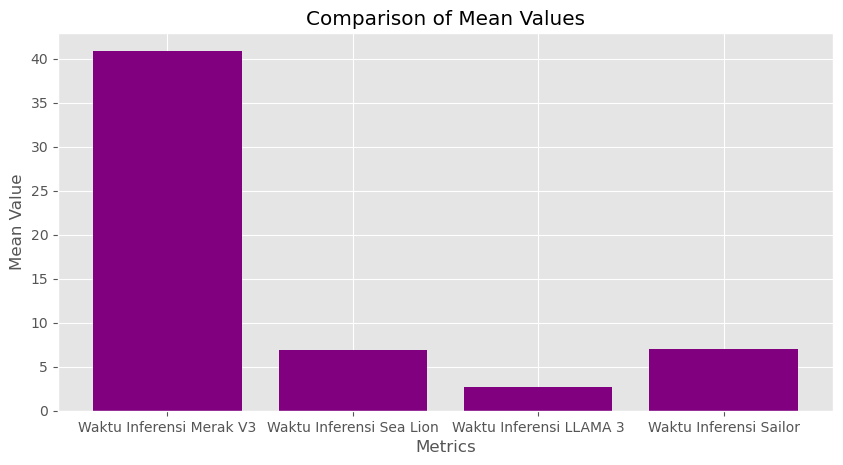

In [914]:
# Plotting
plt.figure(figsize=(10, 6))
labels = ['Waktu Inferensi Merak V3', 'Waktu Inferensi Sea Lion', 'Waktu Inferensi LLAMA 3', 'Waktu Inferensi Sailor']
mean_inff = [mean_inf_a, mean_inf_b, mean_inf_c, mean_inf_d]
create_plot(labels,mean_inff)

# Histogram

In [915]:
# import seaborn as sns

# plt.style.use('ggplot')

# def create_histogram(df):
    
#     for i in range(len(df)):
#         plt.figure(figsize=(8,5))
        
#         plt.subplot(1,2,i+1)    
#         sns.histplot(data=df[i], x='Inference Time')
#         plt.xlabel('Waktu Inferensi (Seconds)')
#         plt.title('Comparison of Mean Values')
#         plt.show()

In [916]:
# create_histogram([df,df1])